In [1]:
import matplotlib.pyplot as plt

from multiprocessing import Pool
from ovals.geometry import Oval, Ellipse
from ovals.math_calculations import get_lines_intersection_point, get_wurf_value
from ovals.math_visualisation import get_figure, put_points

In [2]:
def get_functunal((L, R, T, A)):
    try:
        L_R, L, R, T, A, L_T, RA_LT, LA_R, A_L, R_A, R_T, RT_A_L__RA_LT, T_A, RT_LA, LA__A_L__RA_LT, L_R__RT_LA___A_L__RA_LT = get_support_points(L, R, A, T)['points']
    except Exception as e:
        return
    v1 = get_wurf_value(A_L, T_A, A, R_A)
    v2 = get_wurf_value(A_L, L_T, L, L_R)
    v3 = get_wurf_value(L, RT_LA, A, LA_R)
    v4 = get_wurf_value(L, A, LA__A_L__RA_LT, LA_R)
    v5 = get_wurf_value(L_T, T, T_A, R_T)
    v6 = get_wurf_value(L_R, R, R_A, R_T)
    w1 = get_wurf_value(LA__A_L__RA_LT, A, RT_LA, L)
    w2 = get_wurf_value(RT_A_L__RA_LT, T, RT_LA, R)
    w3 = get_wurf_value(L_R__RT_LA___A_L__RA_LT, T_A, RT_LA, L_R)
    F = abs(w1 - 1) + abs(w2 - 1) + abs(w3 - 1) + abs(v1 - v3) + abs(v1 * v2 - 1) + abs(v4 - v1 - 1)
    return [F, (L, R, T, A)]


### 1. Отрисуем эллипс.

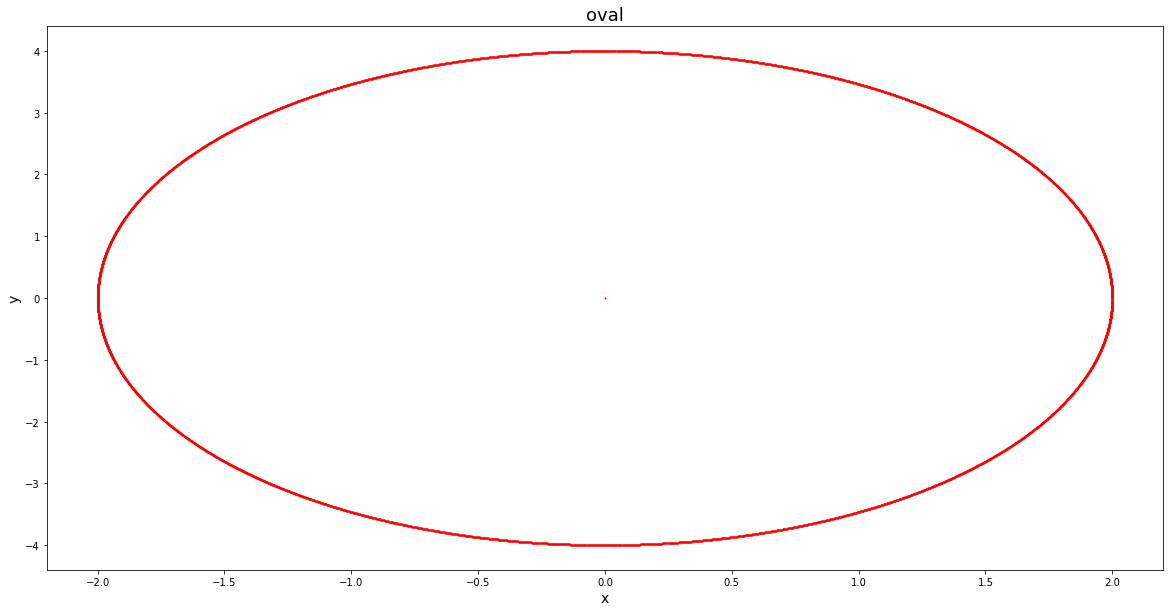

In [3]:
a = 2
b = 4
ellipse = Ellipse(a, b)
put_points(get_figure(plt, 'oval'), ellipse.points).show()

### 2. Отрисуем овал после преобразования эллипса.

In [63]:
a = 2
b = 4
power = 2.4
projective_coefficents= [10, 12, 3, 10, 4, 12, 6, 2]
# projective_coefficents= [1, 2, 3, 3, 4, 2, 6, 2]
l, r = 253, 2393

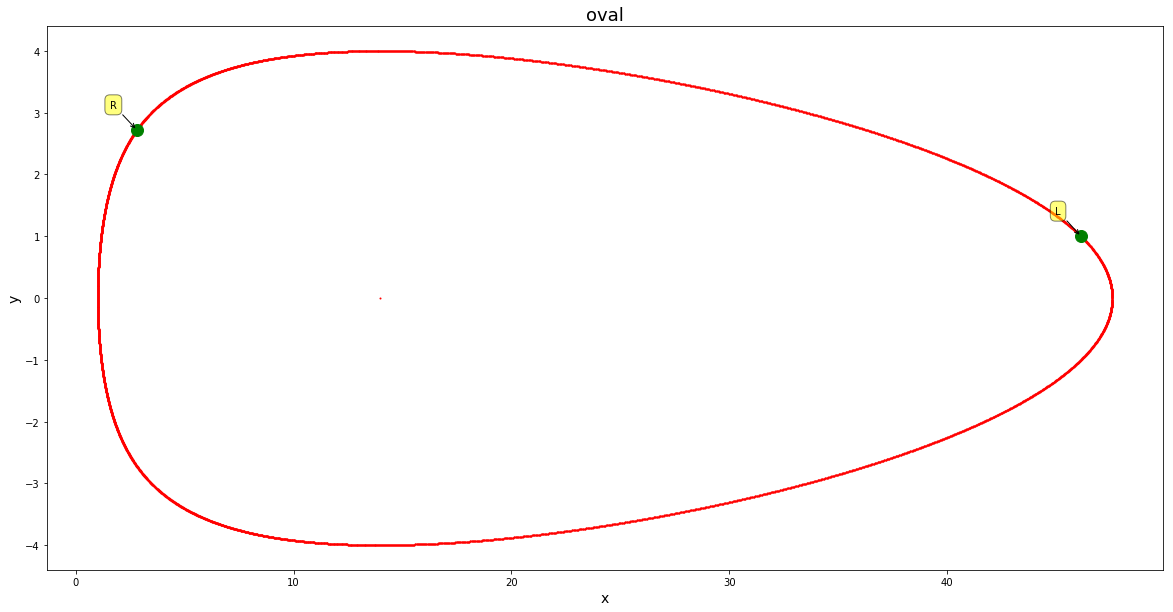

In [64]:
oval = Oval(a, b, power)
p = get_figure(plt, 'oval')
p = put_points(p, oval.points)
p = put_points(p, [oval.points[l], oval.points[r]], 'go', markersize=12, labels=['L', 'R'])
p.show()

### Преобразуем его к овалу и отрисуем касательные

In [65]:
oval.projective_transform(*projective_coefficents)
result = {}
L = oval.points[l]
R = oval.points[r]

inputs = []
for i in xrange(0, len(oval.points), 100):
    for j in xrange(0, len(oval.points), 100):
        T, A = oval.points[i], oval.points[j]
        inputs.append([L, R, T, A])
p = Pool(4)
res = p.map(get_functunal, inputs)
print min([x[0] for x in res if x is not None])

0.335894571494


In [66]:
a = min([x[0] for x in res if x is not None])
args = [x[1] for x in res if x is not None and x[0] == a][0]
indexes = []
for i, pn in enumerate(oval.points):
    if pn == args[-1] or pn == args[-2] or pn == args[0] or pn == args[1]:
        indexes.append(i)
print indexes

[253, 2393, 3400, 5300]


253 2393 3400 5300


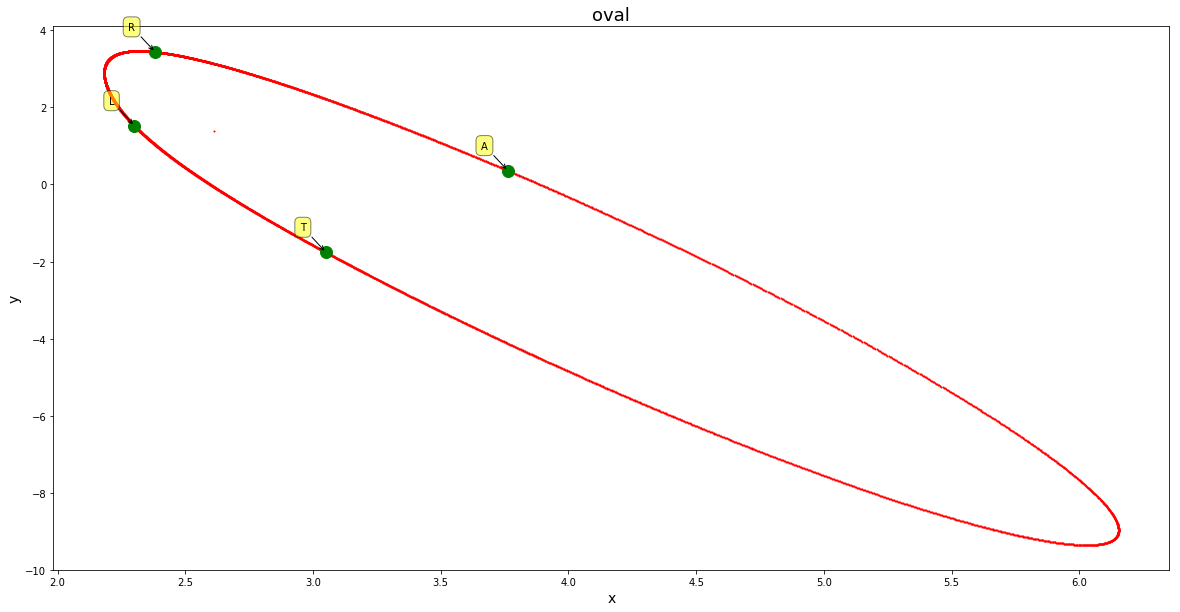

In [67]:
oval = Oval(a, b, power)
oval.projective_transform(10, 12, 3, 10, 4, 12, 6, 2)
i, j, k, l = indexes
print i, j, k, l
L, R, T, A = oval.points[i], oval.points[j], oval.points[k], oval.points[l]
p = get_figure(plt, 'oval')
p = put_points(p, oval.points)
p = put_points(p, [L, R, A, T], 'go', markersize=12, labels=['L', 'R', 'T', 'A'])
p = put_points(p, oval.form_line_by_two_points(L, R).points, 'go')
p.show()

### Восстанавливаем точки на исходном овале, чтобы убедиться лишний раз что мы все сделали правильно.

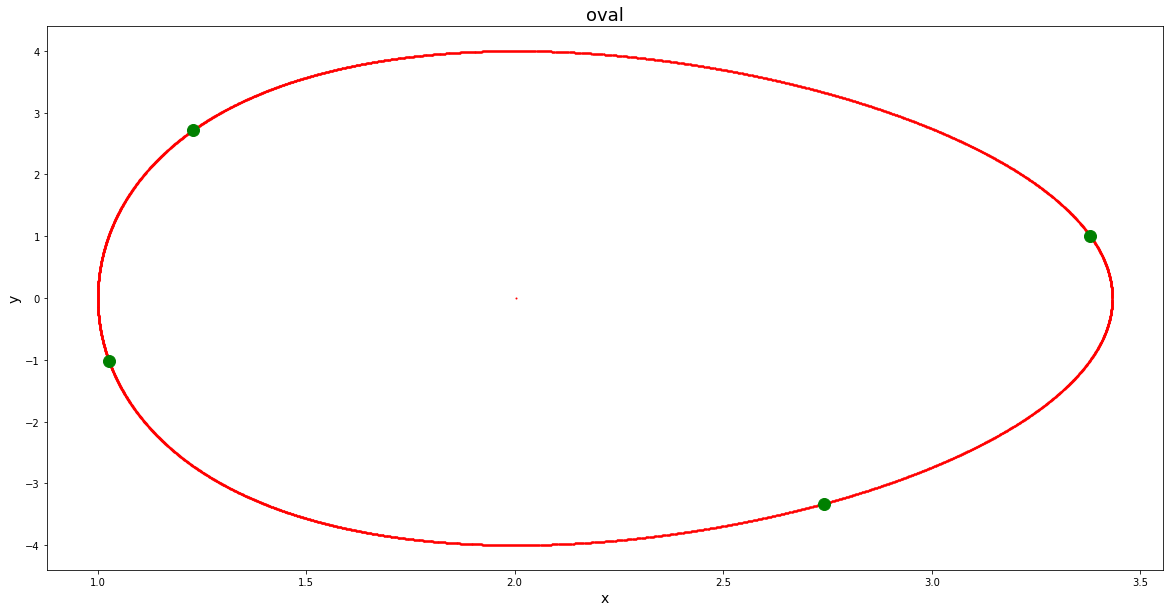

In [68]:
oval = Oval(a, b, power)
p = get_figure(plt, 'oval')
# check result
i, j, k, l = indexes
L, R, T, A = oval.points[i], oval.points[j], oval.points[k], oval.points[l]
p = put_points(p, oval.points)
p = put_points(p, [L, R, T, A], 'go', markersize=12)
p.show()

## Тут мы моделируем то, что на картинке в лекциях, чтобы аккуратно расписать функционал

In [4]:
def get_support_points(L, R, A, T):
    LA = oval.form_line_by_two_points(L, A)
    LT = oval.form_line_by_two_points(L, T)
    RA = oval.form_line_by_two_points(R, A)
    RT = oval.form_line_by_two_points(R, T)


    L_tangent = oval.get_tangent_line(L, down_power=2., up_power=2.0, left_power=2.0, right_power=2.0)
    R_tangent = oval.get_tangent_line(R, left_power=1, right_power=1.3, down_power=12.7, up_power=1)
    A_tangent = oval.get_tangent_line(A, left_power=1, right_power=.3, down_power=1.7, up_power=1)
    T_tangent = oval.get_tangent_line(T, left_power=1, right_power=.3, down_power=1.7, up_power=1)

    L_R = get_lines_intersection_point(L_tangent, R_tangent)
    L_T = get_lines_intersection_point(L_tangent, T_tangent)
    A_L = get_lines_intersection_point(A_tangent, L_tangent)
    R_A = get_lines_intersection_point(R_tangent, A_tangent)
    RA_LT = get_lines_intersection_point(RA, LT)
    A_L__RA_LT = oval.form_line_by_two_points(A_L, RA_LT)
    R_T = get_lines_intersection_point(R_tangent, T_tangent)
    LA_R = get_lines_intersection_point(LA, R_tangent)
    RT_A_L__RA_LT = get_lines_intersection_point(RT, A_L__RA_LT)
    RT_LA = get_lines_intersection_point(RT, LA)
    L_R__RT_LA = oval.form_line_by_two_points(L_R, RT_LA)
    L_R__RT_LA___A_L__RA_LT = get_lines_intersection_point(L_R__RT_LA, A_L__RA_LT)
    T_A = get_lines_intersection_point(T_tangent, A_tangent)
    LA__A_L__RA_LT = get_lines_intersection_point(LA, A_L__RA_LT)
    result = {
        'points': [L_R, L, R, T, A, L_T, RA_LT, LA_R, A_L, R_A, R_T, RT_A_L__RA_LT, T_A, RT_LA, LA__A_L__RA_LT, L_R__RT_LA___A_L__RA_LT],
        'labels': ['L_R', 'L', 'R', 'T', 'A', 'L_T', 'RA_LT', 'LA_R', 'A_L', 'R_A', 'R_T', 'RT_A_L__RA_LT', 'T_A', 'RT_LA', 'LA__A_L__RA_LT', 'L_R__RT_LA___A_L__RA_LT']
    }
    return result


In [ ]:
a = 2
b = 4
power = 1.4
oval = Oval(a, b, power)
oval.projective_transform(10, 12, 3, 10, 4, 12, 6, 2)
L = oval.points[-253]
R = oval.points[-2393]
A = oval.points[3300]
T = oval.points[2600]
support_points = get_support_points(L, R, A, T)
p = get_figure(plt, 'oval')
p = put_points(p, oval.points)
p = put_points(p, support_points['points'], 'go', markersize=12, labels=support_points['labels'])
p = put_points(p, oval.form_line_by_two_points(L, R).points, 'go')
p.show()